In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
import mpl_toolkits
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
perth = pd.read_csv("all_perth_310121.csv")

In [3]:
perth.head(5)

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [4]:
perth.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,33656.0,637072.005794,355825.632737,51000.000000,410000.000000,535500.000000,760000.000000,2.440000e+06
BEDROOMS,33656.0,3.659110,0.752038,1.000000,3.000000,4.000000,4.000000,1.000000e+01
BATHROOMS,33656.0,1.823063,0.587427,1.000000,1.000000,2.000000,2.000000,1.600000e+01
GARAGE,31178.0,2.199917,1.365225,1.000000,2.000000,2.000000,2.000000,9.900000e+01
LAND_AREA,33656.0,2740.644016,16693.513215,61.000000,503.000000,682.000000,838.000000,9.999990e+05
FLOOR_AREA,33656.0,183.501545,72.102982,1.000000,130.000000,172.000000,222.250000,8.700000e+02
BUILD_YEAR,30501.0,1989.706436,20.964330,1868.000000,1978.000000,1995.000000,2005.000000,2.017000e+03
CBD_DIST,33656.0,19777.374465,11364.415413,681.000000,11200.000000,17500.000000,26600.000000,5.980000e+04
NEAREST_STN_DIST,33656.0,4523.371494,4495.064024,46.000000,1800.000000,3200.000000,5300.000000,3.550000e+04
POSTCODE,33656.0,6089.420074,62.167921,6003.000000,6050.000000,6069.000000,6150.000000,6.558000e+03


In [5]:
perth.shape

(33656, 19)

In [6]:
perth["SUBURB"].value_counts() ##too many suburb categories to consider in analysis, hence it needs to be removed.

Bertram            231
Iluka              212
Bennett Springs    211
Mindarie           209
Carramar           208
                  ... 
Munster              1
Kwinana Beach        1
Welshpool            1
Wangara              1
Naval Base           1
Name: SUBURB, Length: 321, dtype: int64

In [7]:
##Checking for null values 
perth.isna().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

In [8]:
##Removing null values (rows) from dataset
perth = perth.dropna()

In [9]:
##Removing build year column
del (perth["BUILD_YEAR"])

In [10]:
##Removing Address and Surbub columns 
del (perth["SUBURB"])
del (perth["ADDRESS"])
del (perth["POSTCODE"])

In [11]:
##Checking if all null values are removed
perth.isna().sum()

PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
CBD_DIST            0
NEAREST_STN         0
NEAREST_STN_DIST    0
DATE_SOLD           0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH         0
NEAREST_SCH_DIST    0
NEAREST_SCH_RANK    0
dtype: int64

In [12]:
perth.shape

(19208, 15)

In [13]:
perth.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,19208.0,699865.807840,387294.392907,52000.000000,438000.000000,585000.000000,850000.000000,2.440000e+06
BEDROOMS,19208.0,3.676020,0.750726,1.000000,3.000000,4.000000,4.000000,1.000000e+01
BATHROOMS,19208.0,1.861776,0.587704,1.000000,2.000000,2.000000,2.000000,7.000000e+00
GARAGE,19208.0,2.183205,1.221165,1.000000,2.000000,2.000000,2.000000,5.000000e+01
LAND_AREA,19208.0,2441.914879,18446.099139,61.000000,494.000000,675.000000,809.000000,9.999990e+05
FLOOR_AREA,19208.0,187.532330,72.985315,1.000000,134.000000,177.000000,228.000000,8.490000e+02
CBD_DIST,19208.0,18327.112922,10937.511971,1300.000000,10100.000000,15800.000000,24300.000000,5.690000e+04
NEAREST_STN_DIST,19208.0,4188.389681,4172.353928,46.000000,1600.000000,3000.000000,5100.000000,3.430000e+04
LATITUDE,19208.0,-31.949166,0.167803,-32.455550,-32.047148,-31.937099,-31.823297,-3.159591e+01
LONGITUDE,19208.0,115.864546,0.109222,115.675834,115.778941,115.842006,115.940476,1.163418e+02


<AxesSubplot:>

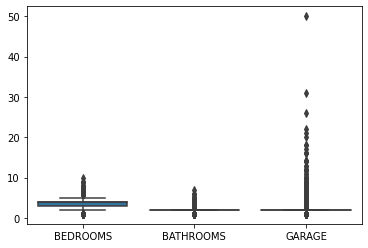

In [14]:
sns.boxplot(data=perth[["BEDROOMS", "BATHROOMS", "GARAGE"]])

In [15]:
##Removing outliers
##Removing all rows where garage is more than 2 in value
##Removing all rows where bedrooms are more than 5
##Removing all rows where price is negative 
perth = perth.drop(perth[perth["GARAGE"] > 2].index)
perth = perth.drop(perth[perth["BATHROOMS"] > 2].index)
perth = perth.drop(perth[perth["PRICE"] <0].index)

In [16]:
perth.shape

(14895, 15)

/Users/kevin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kevin/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'How geographically spread are the houses?')

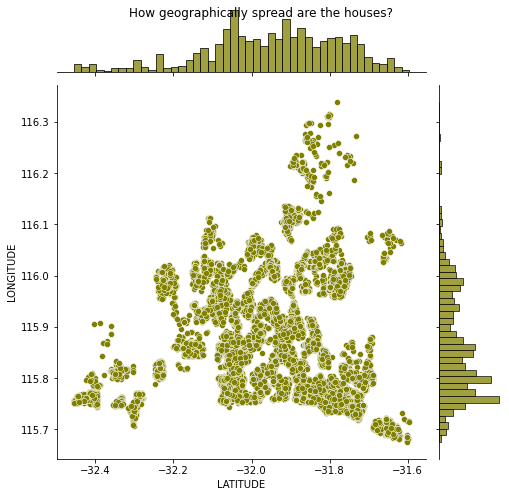

In [17]:
##Checking dispersion of the geographical data
spread = sns.jointplot(perth["LATITUDE"], perth["LONGITUDE"], size=7, color="olive")
plt. suptitle("How geographically spread are the houses?")

Text(0.5, 1.0, 'Number of bedrooms Vs Price')

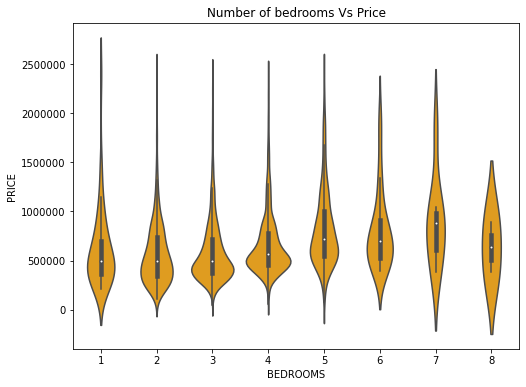

In [18]:
a4_dims = (8, 6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(data=perth, x="BEDROOMS", y="PRICE", scale="area", color="orange")
plt.ticklabel_format(style='sci', axis='y', scilimits=(3,10))
plt.title("Number of bedrooms Vs Price")

Text(0.5, 1.0, 'Number of bathrooms Vs Price')

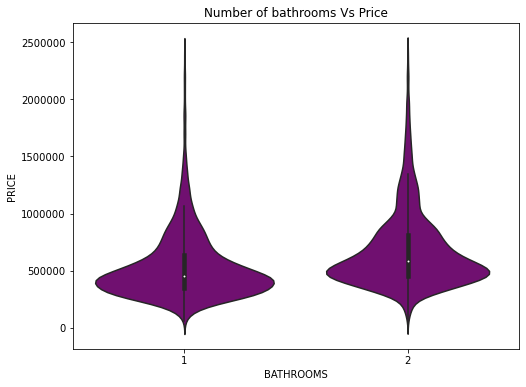

In [19]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(data=perth, x="BATHROOMS", y="PRICE", color="purple")
plt.ticklabel_format(style='sci', axis='y', scilimits=(3,10))
plt.title("Number of bathrooms Vs Price")

Text(0.5, 1.0, 'Number of garage Vs Price')

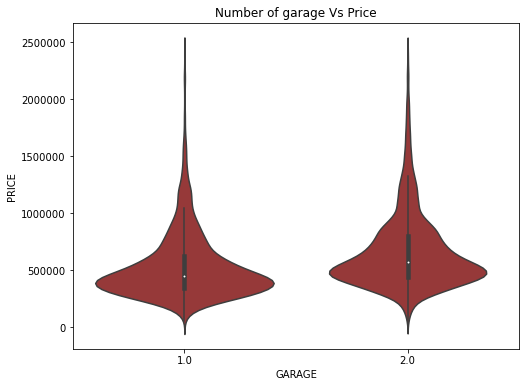

In [20]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(data=perth, x="GARAGE", y="PRICE", color="brown")
plt.ticklabel_format(style='sci', axis='y', scilimits=(3,10))
plt.title("Number of garage Vs Price")

(-50.0, 800.0)

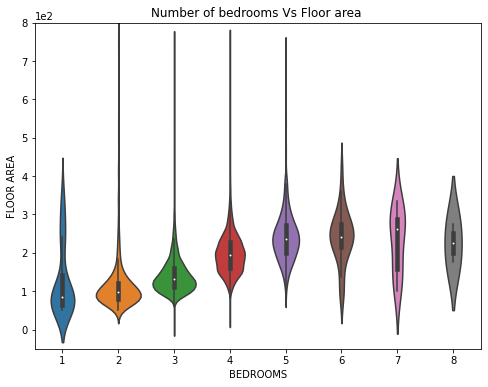

In [21]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(data=perth, x="BEDROOMS", y="FLOOR_AREA")
plt.ticklabel_format(style='sci', axis='y', scilimits=(4,12))
plt.ylabel("FLOOR AREA")
plt.title("Number of bedrooms Vs Floor area ")
ax.set_ylim(-50, 800)

(-50.0, 800.0)

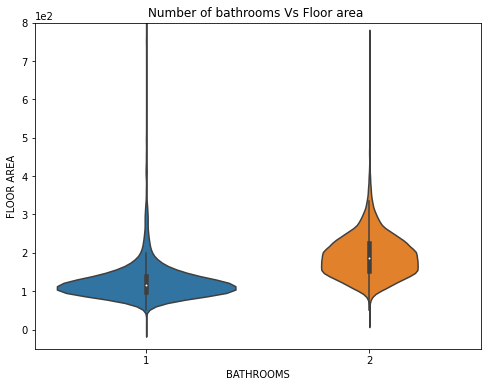

In [22]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(data=perth, x="BATHROOMS", y="FLOOR_AREA")
plt.ticklabel_format(style='sci', axis='y', scilimits=(4,12))
plt.ylabel("FLOOR AREA")
plt.title("Number of bathrooms Vs Floor area ")
ax.set_ylim(-50, 800)

(-50.0, 800.0)

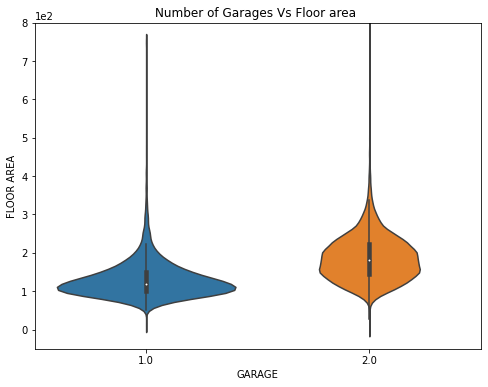

In [23]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(data=perth, x="GARAGE", y="FLOOR_AREA")
plt.ticklabel_format(style='sci', axis='y', scilimits=(4,12))
plt.ylabel("FLOOR AREA")
plt.title("Number of Garages Vs Floor area ")
ax.set_ylim(-50, 800)

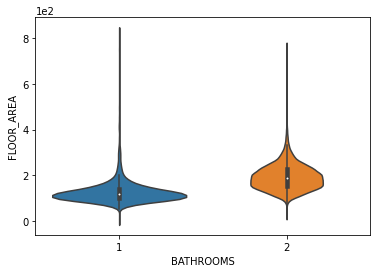

In [24]:
sns.violinplot(data=perth, x="BATHROOMS", y="FLOOR_AREA")
plt.ticklabel_format(style='sci', axis='y', scilimits=(3,10))

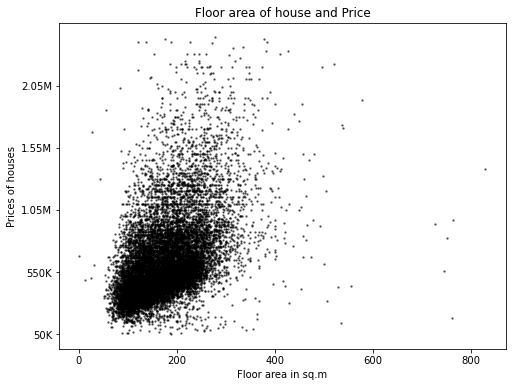

In [25]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.scatter(perth["FLOOR_AREA"], perth["PRICE"], alpha=0.5, s=2, color="black")
plt.yticks(range(50000,2500000,500000), ["50K", "550K", "1.05M", "1.55M", "2.05M"])
plt.ylabel("Prices of houses")
plt.xlabel("Floor area in sq.m")
plt.title("Floor area of house and Price")
plt.show()

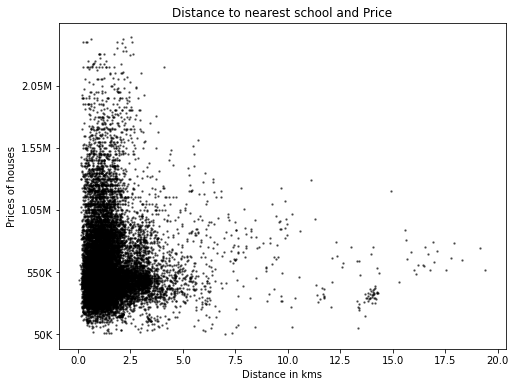

In [26]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.scatter(perth["NEAREST_SCH_DIST"], perth["PRICE"], alpha=0.5, s=2, color="black")
plt.yticks(range(50000,2500000,500000), ["50K", "550K", "1.05M", "1.55M", "2.05M"])
plt.ylabel("Prices of houses")
plt.xlabel("Distance in kms")
plt.title("Distance to nearest school and Price")
plt.show()

In [27]:
perth["GARAGE"].describe()

count    14895.000000
mean         1.788922
std          0.408087
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: GARAGE, dtype: float64

In [28]:
perth.columns.values

array(['PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA',
       'FLOOR_AREA', 'CBD_DIST', 'NEAREST_STN', 'NEAREST_STN_DIST',
       'DATE_SOLD', 'LATITUDE', 'LONGITUDE', 'NEAREST_SCH',
       'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'], dtype=object)

In [29]:
##Calculation of number of bins to be used in histogram
binsqrt = math.sqrt(21066)
binsqrt

145.14131045295133

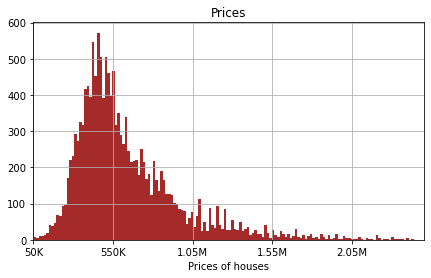

In [30]:
##Dispersion of price 
perth.hist(["PRICE"], bins=150, figsize=(7, 4), color="brown" )
plt.title("Prices")
plt.xlim([50000,2500000])
#plt.yticks(perth["PRICE"], labx, rotation="horizontal")
plt.xticks(range(50000,2500000,500000), ["50K", "550K", "1.05M", "1.55M", "2.05M"])
plt.xlabel("Prices of houses")
plt.show()

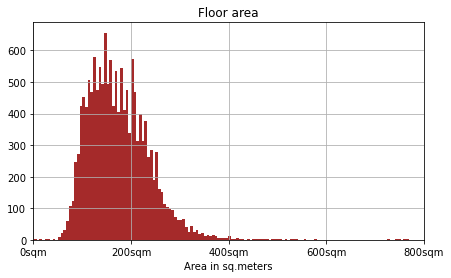

In [31]:
perth.hist(["FLOOR_AREA"], bins=150, figsize=(7, 4), color="brown" )
plt.title("Floor area")
plt.xlim([0,800])
#plt.yticks(perth["PRICE"], labx, rotation="horizontal")
plt.xticks(range(0,1000,200), ["0sqm", "200sqm", "400sqm", "600sqm", "800sqm"])
plt.xlabel("Area in sq.meters")
plt.show()

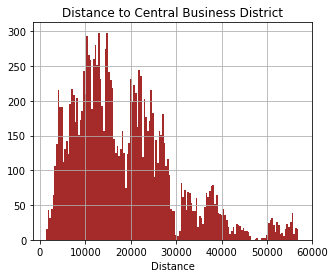

In [32]:
perth.hist(["CBD_DIST"], bins=150, figsize=(5, 4), color="brown" )
plt.title("Distance to Central Business District")
plt.xticks(range(0,70000,10000), ["0", "10000", "20000", "30000", "40000", "50000", "60000"])
plt.xlabel("Distance")
plt.show()

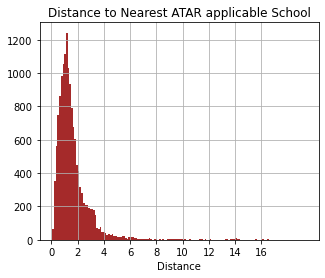

In [33]:
perth.hist(["NEAREST_SCH_DIST"], bins=150, figsize=(5, 4), color="brown" )
plt.title("Distance to Nearest ATAR applicable School")
plt.xticks(range(0,18,2), ["0", "2", "4", "6", "8", "10", "12", "14", "16"])
plt.xlabel("Distance")
plt.show()

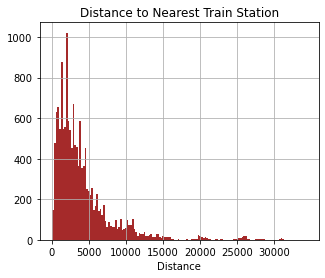

In [34]:
perth.hist(["NEAREST_STN_DIST"], bins=150, figsize=(5, 4), color="brown" )
plt.title("Distance to Nearest Train Station")
plt.xticks(range(0,35000,5000), ["0", "5000", "10000", "15000", "20000", "25000", "30000"])
plt.xlabel("Distance")
plt.show()

In [35]:
perth.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,14895.0,638428.252501,331974.108357,52000.000000,420000.000000,545000.000000,770000.000000,2.437000e+06
BEDROOMS,14895.0,3.569117,0.688225,1.000000,3.000000,4.000000,4.000000,8.000000e+00
BATHROOMS,14895.0,1.734676,0.441520,1.000000,1.000000,2.000000,2.000000,2.000000e+00
GARAGE,14895.0,1.788922,0.408087,1.000000,2.000000,2.000000,2.000000,2.000000e+00
LAND_AREA,14895.0,2087.221215,18721.608215,61.000000,472.000000,629.000000,769.000000,9.999990e+05
FLOOR_AREA,14895.0,174.947768,62.018856,1.000000,129.000000,167.000000,212.000000,8.300000e+02
CBD_DIST,14895.0,18627.949446,11025.910826,1300.000000,10400.000000,16200.000000,24400.000000,5.690000e+04
NEAREST_STN_DIST,14895.0,4066.187983,4000.206880,46.000000,1600.000000,2900.000000,5000.000000,3.430000e+04
LATITUDE,14895.0,-31.948591,0.172619,-32.455550,-32.050455,-31.936280,-31.814702,-3.159591e+01
LONGITUDE,14895.0,115.861375,0.105564,115.675834,115.778844,115.839916,115.937125,1.163393e+02


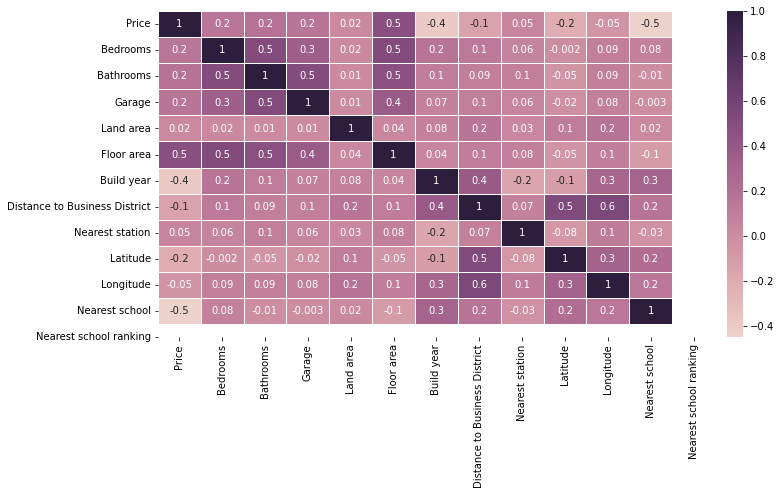

In [36]:
plt.figure(figsize = (12,6))
colms = ["Price", "Bedrooms", "Bathrooms", "Garage", "Land area", "Floor area", "Build year", "Distance to Business District", "Nearest station", "Latitude", "Longitude", "Nearest school", "Nearest school ranking"]
sns.heatmap(perth.corr(), annot=True, linewidths = 1, fmt=".1g", yticklabels=colms, xticklabels=colms, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

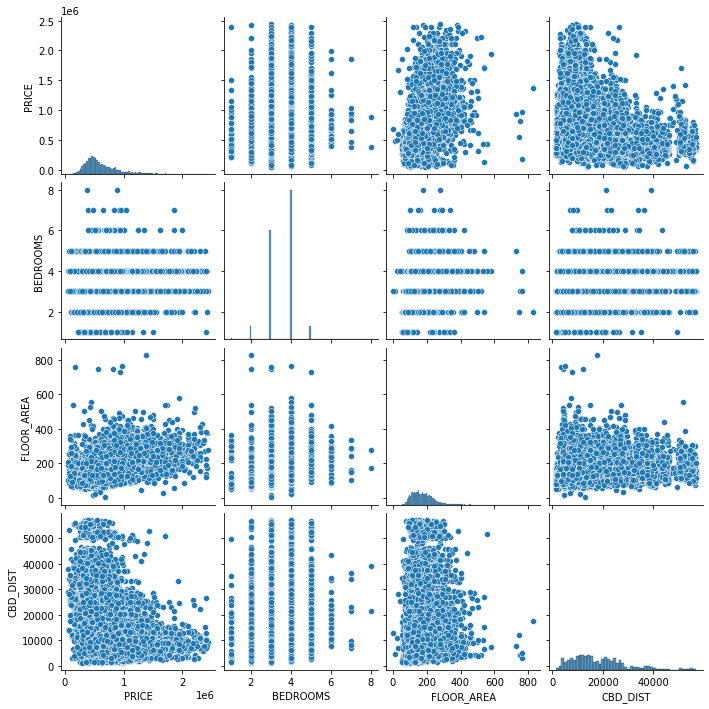

In [37]:
sns.pairplot(perth[['PRICE','BEDROOMS', 'FLOOR_AREA', 'CBD_DIST']])
plt.show()

In [38]:
corr_matrix = perth.corr()
corr_matrix['PRICE'].sort_values(ascending=False)

PRICE               1.000000
FLOOR_AREA          0.481318
BATHROOMS           0.190608
GARAGE              0.161730
BEDROOMS            0.157580
LATITUDE            0.053654
LAND_AREA           0.021648
NEAREST_SCH_DIST   -0.051584
NEAREST_STN_DIST   -0.144857
LONGITUDE          -0.209491
CBD_DIST           -0.404161
NEAREST_SCH_RANK   -0.450671
Name: PRICE, dtype: float64

In [39]:
corr_matrix

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
PRICE,1.000000,0.157580,0.190608,0.161730,0.021648,0.481318,-0.404161,-0.144857,0.053654,-0.209491,-0.051584,-0.450671
BEDROOMS,0.157580,1.000000,0.516189,0.338581,0.022717,0.523490,0.175090,0.129703,0.064355,-0.001523,0.091155,0.079152
BATHROOMS,0.190608,0.516189,1.000000,0.516407,0.009709,0.477531,0.107644,0.089592,0.095456,-0.050867,0.092750,-0.010102
GARAGE,0.161730,0.338581,0.516407,1.000000,0.013007,0.373157,0.074767,0.098441,0.055967,-0.016369,0.083845,-0.002853
LAND_AREA,0.021648,0.022717,0.009709,0.013007,1.000000,0.038263,0.079156,0.161878,0.026818,0.113331,0.181649,0.022772
FLOOR_AREA,0.481318,0.523490,0.477531,0.373157,0.038263,1.000000,0.042757,0.106439,0.084038,-0.052684,0.100101,-0.102462
CBD_DIST,-0.404161,0.175090,0.107644,0.074767,0.079156,0.042757,1.000000,0.379470,-0.165619,-0.114024,0.290973,0.300269
NEAREST_STN_DIST,-0.144857,0.129703,0.089592,0.098441,0.161878,0.106439,0.379470,1.000000,0.073512,0.534292,0.555704,0.173652
LATITUDE,0.053654,0.064355,0.095456,0.055967,0.026818,0.084038,-0.165619,0.073512,1.000000,-0.080579,0.116140,-0.034390
LONGITUDE,-0.209491,-0.001523,-0.050867,-0.016369,0.113331,-0.052684,-0.114024,0.534292,-0.080579,1.000000,0.309559,0.222680


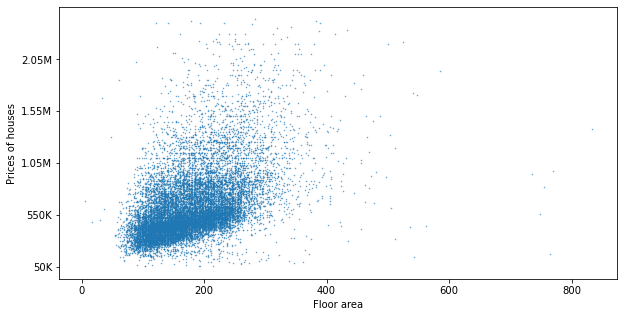

In [40]:
plt.figure(figsize=(10, 5))
plt.scatter((perth["FLOOR_AREA"]+ perth["BATHROOMS"] + perth["BEDROOMS"]),perth["PRICE"], s=0.25, alpha=0.7)
plt.yticks(range(50000,2500000,500000), ["50K", "550K", "1.05M", "1.55M", "2.05M"])
plt.ylabel("Prices of houses")
plt.xlabel("Floor area")
plt.show()
plt.show()

<AxesSubplot:xlabel='FLOOR_AREA', ylabel='PRICE'>

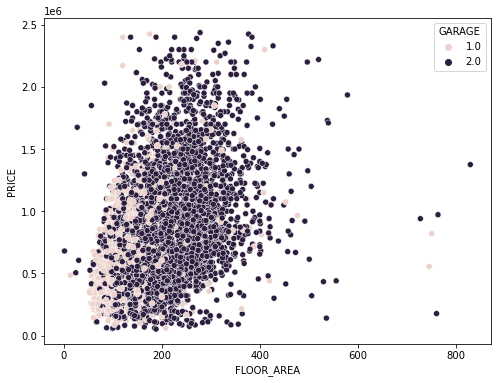

In [41]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data=perth, x='FLOOR_AREA',y='PRICE', hue="GARAGE")

<AxesSubplot:xlabel='NEAREST_SCH_RANK', ylabel='PRICE'>

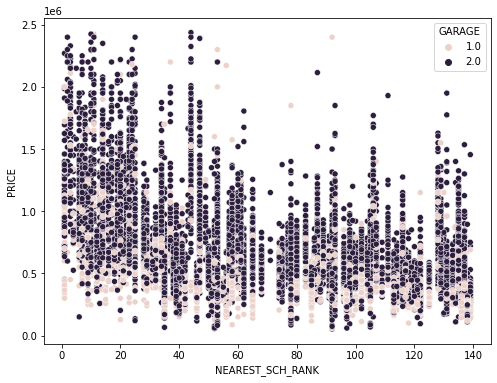

In [42]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data=perth, x='NEAREST_SCH_RANK',y='PRICE', hue="GARAGE")

<AxesSubplot:xlabel='CBD_DIST', ylabel='PRICE'>

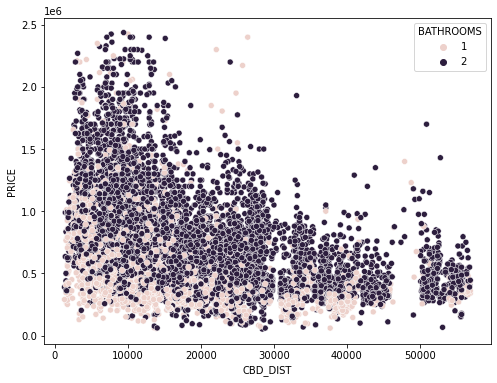

In [43]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data=perth, x='CBD_DIST',y='PRICE', hue="BATHROOMS")

In [44]:
##UNSUPERVISED LEARNING 
##Kmeans clustering 

In [45]:
feat = perth.loc[:,['BEDROOMS', 'FLOOR_AREA' , 'CBD_DIST', "NEAREST_SCH_DIST"]]

In [46]:
feat.head()

,BEDROOMS,FLOOR_AREA,CBD_DIST,NEAREST_SCH_DIST
1,3,139,26900,5.524324
2,3,86,22600,1.649178
11,3,158,36300,0.680843
16,4,154,36700,14.013548
17,4,225,15300,2.746772


In [47]:
##Scaling all features in our dataset with MinMax scaler (ranging from 0 to 1)
scaler= MinMaxScaler()
scaler.fit(feat[["BEDROOMS"]])
feat["BEDROOMS"] = scaler.transform(feat[["BEDROOMS"]])

scaler.fit(feat[["FLOOR_AREA"]])
feat["FLOOR_AREA"] = scaler.transform(feat[["FLOOR_AREA"]])

scaler.fit(feat[["CBD_DIST"]])
feat["CBD_DIST"] = scaler.transform(feat[["CBD_DIST"]])
feat.head()

scaler.fit(feat[["NEAREST_SCH_DIST"]])
feat["NEAREST_SCH_DIST"] = scaler.transform(feat[["NEAREST_SCH_DIST"]])
feat.head()


,BEDROOMS,FLOOR_AREA,CBD_DIST,NEAREST_SCH_DIST
1,0.285714,0.166466,0.460432,0.282044
2,0.285714,0.102533,0.383094,0.081626
11,0.285714,0.189385,0.629496,0.031545
16,0.428571,0.184560,0.636691,0.721097
17,0.428571,0.270205,0.251799,0.138392


In [48]:
##Giving a range for k-means, so that I can determine the number of clusters to go for optimally 
#Also forming an emoty list for sse to capture standard error 
krange = range(1,50)
sse=[]

In [49]:
for k in krange:
    km = KMeans(n_clusters=k)
    km.fit(feat[["BEDROOMS", "FLOOR_AREA", "CBD_DIST", "NEAREST_SCH_DIST"]])
    sse.append(km.inertia_)

In [50]:
sse

[902.3354879694062,
 513.2209861482183,
 392.42402622645307,
 315.42990758717406,
 274.3027998766781,
 237.41954707234245,
 212.11983966132337,
 194.91865753487127,
 180.201947081326,
 168.37788851378195,
 156.9885581005492,
 147.4973105159668,
 139.40620906636258,
 131.58554708848948,
 124.18801278423865,
 119.8433914426265,
 116.1001686927149,
 112.33385524900415,
 108.74464447291258,
 105.60325641246904,
 102.35996287508212,
 98.83573915173342,
 96.5027052694305,
 92.97646748828136,
 90.7838213065062,
 88.03431680015383,
 85.63296849096417,
 83.10170834289556,
 81.93815712365705,
 78.87238792969185,
 77.90518862040157,
 75.75881306210832,
 74.90221070955702,
 73.04349982079431,
 71.87673202750771,
 70.352184484134,
 68.90383147873331,
 68.28681590577878,
 66.7679044319416,
 66.15759595153932,
 64.94312509363941,
 63.64741084297625,
 63.125295526800066,
 61.846766569034195,
 61.383923380630996,
 60.10907117802908,
 59.860669016873764,
 58.603841097378854,
 57.73558554226053]

Text(0.5, 1.0, 'Elbow curve')

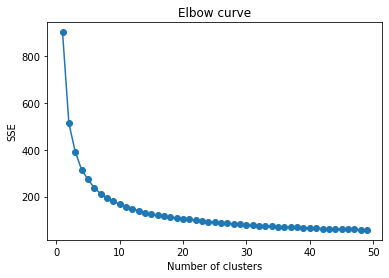

In [51]:
plt.plot(krange,sse, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow curve")

In [52]:
##It seems that k=4 is the optimal number of clusrers, owing to the inflection in the elbow graph at that point

In [53]:
km=KMeans(n_clusters=4)
y_predicted=km.fit_predict(feat[["BEDROOMS", "FLOOR_AREA", "CBD_DIST", "NEAREST_SCH_DIST"]])
y_predicted

array([2, 2, 1, ..., 2, 0, 3], dtype=int32)

In [54]:
feat["cluster"]=y_predicted
feat

,BEDROOMS,FLOOR_AREA,CBD_DIST,NEAREST_SCH_DIST,cluster
1,0.285714,0.166466,0.460432,0.282044,2
2,0.285714,0.102533,0.383094,0.081626,2
11,0.285714,0.189385,0.629496,0.031545,1
16,0.428571,0.184560,0.636691,0.721097,1
17,0.428571,0.270205,0.251799,0.138392,0
...,...,...,...,...,...
33644,0.285714,0.115802,0.363309,0.032582,2
33645,0.285714,0.102533,0.667266,0.087431,1
33648,0.285714,0.129071,0.424460,0.182886,2
33649,0.428571,0.158022,0.284173,0.054092,0


In [55]:
km.cluster_centers_

array([[0.44446429, 0.25153257, 0.18239202, 0.06466785],
       [0.37773259, 0.20662248, 0.7194842 , 0.12219863],
       [0.38987975, 0.21638213, 0.40737301, 0.09781743],
       [0.26298778, 0.16411619, 0.1594273 , 0.06076779]])

In [56]:
##Calculating silhouette score
score = silhouette_score(feat, km.labels_, metric='euclidean')
score

0.8368464129495568

In [57]:
##The silhouette score is high enough to validate the clustering 

Text(0.5, 0, 'Floor area')

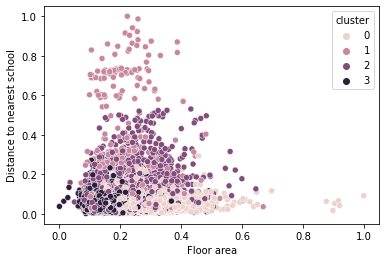

In [58]:
sns.scatterplot(data=feat, x="FLOOR_AREA", y="NEAREST_SCH_DIST", hue="cluster")
plt.ylabel("Distance to nearest school")
plt.xlabel("Floor area")

Text(0, 0.5, 'Distance to nearest school')

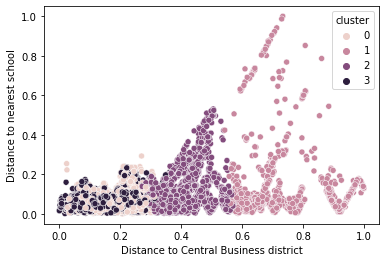

In [59]:
sns.scatterplot(data=feat, x="CBD_DIST", y="NEAREST_SCH_DIST", hue="cluster")
plt.xlabel("Distance to Central Business district")
plt.ylabel("Distance to nearest school")

Text(0, 0.5, 'Distance to nearest business district')

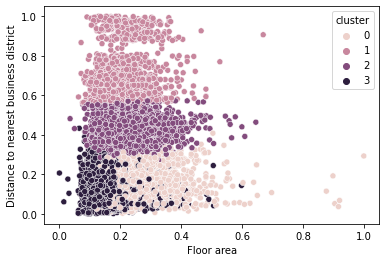

In [60]:
sns.scatterplot(data=feat, x="FLOOR_AREA", y="CBD_DIST", hue="cluster")
plt.xlabel("Floor area")
plt.ylabel("Distance to nearest business district")

In [61]:
##Homogeneity score
homogeneity_score(perth["PRICE"], y_predicted)

0.044660604322770886

In [62]:
##Completeness
completeness_score(perth["PRICE"], y_predicted)

0.20863915643237563

In [63]:
###SUPERVISED LEARNING

In [64]:
del(perth["LATITUDE"])
del(perth["LONGITUDE"])
del(perth["NEAREST_SCH"])
del(perth["DATE_SOLD"])
del(perth["NEAREST_STN"])

In [65]:
x=perth.iloc[:,1:].values
y=perth.iloc[:,0].values

In [66]:
perth

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,NEAREST_SCH_DIST,NEAREST_SCH_RANK
1,365000,3,2,2.0,351,139,26900,4900,5.524324,129.0
2,287000,3,1,1.0,719,86,22600,1900,1.649178,113.0
11,367500,3,2,2.0,398,158,36300,2100,0.680843,39.0
16,350000,4,2,2.0,663,154,36700,26000,14.013548,98.0
17,570000,4,2,2.0,568,225,15300,7000,2.746772,137.0
...,...,...,...,...,...,...,...,...,...,...
33644,445000,3,1,1.0,1000,97,21500,1200,0.700889,102.0
33645,285000,3,1,1.0,1192,86,38400,822,1.761411,97.0
33648,423000,3,2,2.0,248,108,24900,5700,3.607062,129.0
33649,467000,4,2,2.0,400,132,17100,2500,1.116806,53.0


In [67]:
##Splitting the data into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [68]:
model=LinearRegression()

In [69]:
##Fitting the data into a multiple linear regression
model.fit(x_train,y_train)

LinearRegression()

In [70]:
##Predicting prices (y) with the xs from the testing data
y_predict = model.predict(x_test)
y_predict

array([619927.60895898, 419921.2312272 , 510952.90335907, ...,
       740401.10318243, 639475.81361267, 923255.26910191])

In [71]:
r2_score(y_test,y_predict)

0.49528191174893854

In [72]:
y_pred = model.predict(x_test)

In [73]:
model.coef_

array([ 3.76005293e+03, -9.84588175e+03,  1.84204477e+04,  9.30918696e-01,
        2.40043122e+03, -9.99501546e+00, -5.99311301e+00,  1.69558036e+04,
       -2.49719948e+03])

In [75]:
perth

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,NEAREST_SCH_DIST,NEAREST_SCH_RANK
1,365000,3,2,2.0,351,139,26900,4900,5.524324,129.0
2,287000,3,1,1.0,719,86,22600,1900,1.649178,113.0
11,367500,3,2,2.0,398,158,36300,2100,0.680843,39.0
16,350000,4,2,2.0,663,154,36700,26000,14.013548,98.0
17,570000,4,2,2.0,568,225,15300,7000,2.746772,137.0
...,...,...,...,...,...,...,...,...,...,...
33644,445000,3,1,1.0,1000,97,21500,1200,0.700889,102.0
33645,285000,3,1,1.0,1192,86,38400,822,1.761411,97.0
33648,423000,3,2,2.0,248,108,24900,5700,3.607062,129.0
33649,467000,4,2,2.0,400,132,17100,2500,1.116806,53.0


In [74]:
#plt.plot(x_test, y_predict, color="blue", linewidth=3)